# Tools 2 Final Project
## Sean Wendlandt
## 2/14/23

### Loading Dependancies and Reading in Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [2]:
# https://www.kaggle.com/datasets/nguyenthicamlai/ai-ml-data-salaries?select=salaries.csv
df = pd.read_csv('salaries.csv')

In [3]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,AWS Data Architect,258000,USD,258000,US,100,US,L
1,2023,SE,FT,Data Scientist,225000,USD,225000,US,0,US,M
2,2023,SE,FT,Data Scientist,156400,USD,156400,US,0,US,M
3,2023,SE,FT,Data Engineer,190000,USD,190000,US,100,US,M
4,2023,SE,FT,Data Engineer,150000,USD,150000,US,100,US,M
5,2023,SE,FT,Data Scientist,196000,USD,196000,US,0,US,M
6,2023,SE,FT,Data Scientist,121000,USD,121000,US,0,US,M
7,2023,SE,FT,Data Scientist,219000,USD,219000,US,0,US,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,US,0,US,M
9,2023,SE,FT,Data Engineer,230000,USD,230000,US,0,US,M


In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,4134.000000,4.134000e+03,4134.000000,4134.000000
mean,2022.428882,1.894287e+05,139416.264393,45.936139
std,0.684520,6.460075e+05,63605.472000,48.624255
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,96817.000000,0.000000
50%,2023.000000,1.400000e+05,136000.000000,0.000000
75%,2023.000000,1.833100e+05,179820.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [5]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df['employee_residence'].unique()

array(['US', 'AU', 'AE', 'IN', 'BO', 'DE', 'GB', 'CO', 'EG', 'NG', 'CA',
       'UZ', 'ES', 'FR', 'AR', 'GE', 'JP', 'PH', 'ZA', 'IT', 'HK', 'PT',
       'NL', 'CH', 'CF', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'SG', 'SE',
       'SI', 'MX', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY', 'AM', 'BA',
       'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'MA', 'LT', 'BE', 'AS', 'IR',
       'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL', 'PR', 'DK', 'DO', 'ID',
       'MY', 'EE', 'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ',
       'MD', 'LU', 'MT'], dtype=object)

In [8]:
us1 = df[df['employee_residence'] == 'US']
us1.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3306.000000,3306.000000,3306.000000,3306.000000
mean,2022.522384,154269.258923,154269.258923,43.647913
std,0.591632,55724.428005,55724.428005,49.327110
min,2020.000000,24000.000000,24000.000000,0.000000
25%,2022.000000,115934.000000,115934.000000,0.000000
50%,2023.000000,146650.000000,146650.000000,0.000000
75%,2023.000000,185900.000000,185900.000000,100.000000
max,2023.000000,450000.000000,450000.000000,100.000000


In [9]:
NotUS = df[df['employee_residence'] != 'US']
NotUS.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,828.000000,8.280000e+02,828.000000,828.000000
mean,2022.055556,3.298118e+05,80111.916667,55.072464
std,0.876569,1.431271e+06,58358.740772,44.581836
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,4.800000e+04,42936.750000,0.000000
50%,2022.000000,7.000000e+04,66228.500000,50.000000
75%,2023.000000,1.250000e+05,101531.000000,100.000000
max,2023.000000,3.040000e+07,430967.000000,100.000000


### Creating two dataframes, as US/International Countries pay very different salaries

In [10]:
### Assuming there is a difference between US and non-US jobs, making two dfs to explore each repective region
US_df = df[df['employee_residence'] == 'US']
NON_US_df = df[df['employee_residence'] != 'US']

In [11]:
US_df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,AWS Data Architect,258000,USD,258000,US,100,US,L
1,2023,SE,FT,Data Scientist,225000,USD,225000,US,0,US,M
2,2023,SE,FT,Data Scientist,156400,USD,156400,US,0,US,M
3,2023,SE,FT,Data Engineer,190000,USD,190000,US,100,US,M
4,2023,SE,FT,Data Engineer,150000,USD,150000,US,100,US,M


In [12]:
NON_US_df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
13,2023,MI,FT,ML Engineer,300000,USD,300000,AU,0,AU,M
14,2023,MI,FT,ML Engineer,260000,USD,260000,AU,0,AU,M
26,2022,MI,FT,Autonomous Vehicle Operations Lead,15000,USD,15000,AE,50,AE,S
27,2023,MI,FT,Data Analyst,1050000,INR,12771,IN,100,IN,L
28,2022,EN,FT,Applied Machine Learning Engineer,50000,USD,50000,BO,100,SM,M


## Exploratory Data Analysis

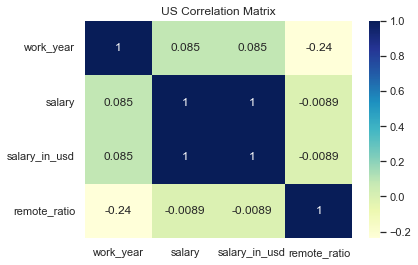

In [13]:
# Plot a correlation matrix to explore the relationship between features and salary
sns.set(style='white')
corr_matrix = US_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('US Correlation Matrix')
plt.show()

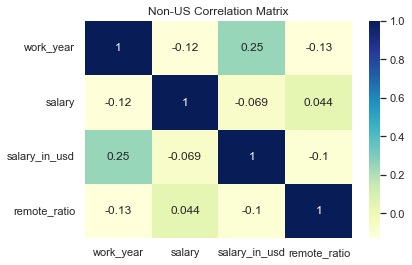

In [14]:
# Plot a correlation matrix to explore the relationship between features and salary
sns.set(style='white')
corr_matrix = NON_US_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Non-US Correlation Matrix')
plt.show()

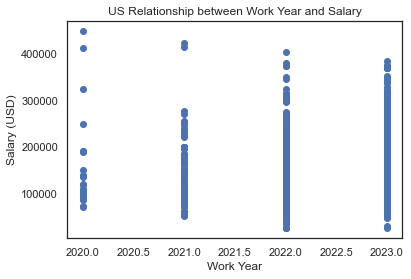

In [15]:
# Plot a scatter plot to explore the relationship between work_year and salary
plt.scatter(US_df['work_year'], US_df['salary_in_usd'])
plt.xlabel('Work Year')
plt.ylabel('Salary (USD)')
plt.title('US Relationship between Work Year and Salary')
plt.show()

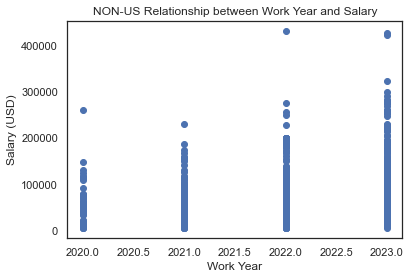

In [16]:
# Plot a scatter plot to explore the relationship between work_year and salary
plt.scatter(NON_US_df['work_year'], NON_US_df['salary_in_usd'])
plt.xlabel('Work Year')
plt.ylabel('Salary (USD)')
plt.title('NON-US Relationship between Work Year and Salary')
plt.show()

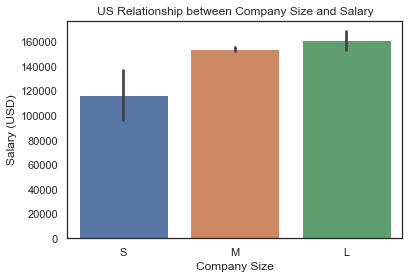

In [17]:
# Define the order of the bars
order = ['S', 'M', 'L']

# Plot a bar plot to explore the relationship between company_size and salary
sns.barplot(x='company_size', y='salary_in_usd', data=US_df, order=order)
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.title('US Relationship between Company Size and Salary')
plt.show()


In [18]:
# Experience Level so we can understand below graph better
US_df.experience_level.replace(['EN','MI','SE','EX'],['Entry','Mid','Senior','Executive'], inplace=True)
NON_US_df.experience_level.replace(['EN','MI','SE','EX'],['Entry','Mid','Senior','Executive'], inplace=True)

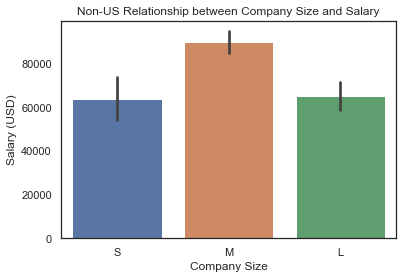

In [19]:
# Define the order of the bars
order = ['S', 'M', 'L']
# Plot a bar plot to explore the relationship between company_size and salary
sns.barplot(x='company_size', y='salary_in_usd', data=NON_US_df, order=order)
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.title('Non-US Relationship between Company Size and Salary')
plt.show()

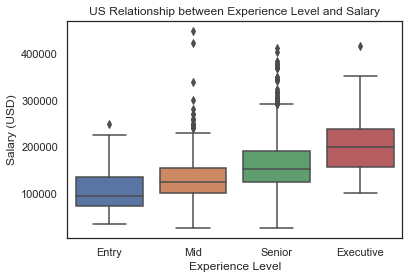

In [20]:
order = ['Entry','Mid','Senior','Executive']
# Plot a box plot to explore the relationship between experience_level and salary
sns.boxplot(x='experience_level', y='salary_in_usd', data=US_df, order=order)
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.title('US Relationship between Experience Level and Salary')
plt.show()

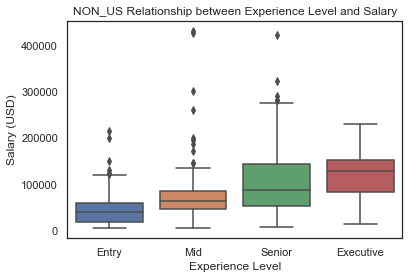

In [21]:
order = ['Entry','Mid','Senior','Executive']
# Plot a box plot to explore the relationship between experience_level and salary
sns.boxplot(x='experience_level', y='salary_in_usd', data=NON_US_df, order=order)
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.title('NON_US Relationship between Experience Level and Salary')
plt.show()

In [22]:
# For US_df DataFrame
us_counts = US_df['experience_level'].value_counts()
print("Experience level counts for US employees:")
print(us_counts)

# For NON_US_df DataFrame
non_us_counts = NON_US_df['experience_level'].value_counts()
print("Experience level counts for non-US employees:")
print(non_us_counts)

Experience level counts for US employees:
Senior       2484
Mid           530
Entry         186
Executive     106
Name: experience_level, dtype: int64
Experience level counts for non-US employees:
Mid          349
Senior       307
Entry        153
Executive     19
Name: experience_level, dtype: int64


In [23]:
def remove_outliers(df):
    # create a dictionary to store quartile bounds for each experience level
    quartile_bounds = {}

    # loop through each unique experience level and calculate quartile bounds and remove outliers
    for exp_level in df['experience_level'].unique():
        # subset the data for the current experience level
        df_exp = df[df['experience_level'] == exp_level]

        # calculate quartile bounds for salary_in_usd column
        q1, q3 = df_exp['salary_in_usd'].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        # store the quartile bounds for the current experience level in the dictionary
        quartile_bounds[exp_level] = (lower_bound, upper_bound)

        # identify outliers for the salary_in_usd column based on the quartile bounds
        outliers = (df_exp['salary_in_usd'] < lower_bound) | (df_exp['salary_in_usd'] > upper_bound)

        # remove the outliers from the current experience level data
        df = df.drop(df_exp.index[outliers])

        # print the count of outliers for the current experience level
        print(f"Experience Level: {exp_level}, Outliers: {outliers.sum()}, Removed: {outliers.sum()}")

    return df, quartile_bounds

# remove outliers for US_df
US_df, quartile_bounds_us = remove_outliers(US_df)
print("Outliers removed for US_df")

# remove outliers for NON_US_df
NON_US_df, quartile_bounds_non_us = remove_outliers(NON_US_df)
print("Outliers removed for NON_US_df")


Experience Level: Mid, Outliers: 19, Removed: 19
Experience Level: Senior, Outliers: 49, Removed: 49
Experience Level: Entry, Outliers: 1, Removed: 1
Experience Level: Executive, Outliers: 1, Removed: 1
Outliers removed for US_df
Experience Level: Mid, Outliers: 10, Removed: 10
Experience Level: Entry, Outliers: 6, Removed: 6
Experience Level: Senior, Outliers: 5, Removed: 5
Experience Level: Executive, Outliers: 0, Removed: 0
Outliers removed for NON_US_df


In [24]:
# Calculate the counts of job positions for 'US' residence
counts_us = df[df['employee_residence'] == 'US']['experience_level'].value_counts()
print(counts_us)
# Calculate the counts of job positions for non-'US' residence
counts_non_us = df[df['employee_residence'] != 'US']['experience_level'].value_counts()
print(counts_non_us)

SE    2484
MI     530
EN     186
EX     106
Name: experience_level, dtype: int64
MI    349
SE    307
EN    153
EX     19
Name: experience_level, dtype: int64


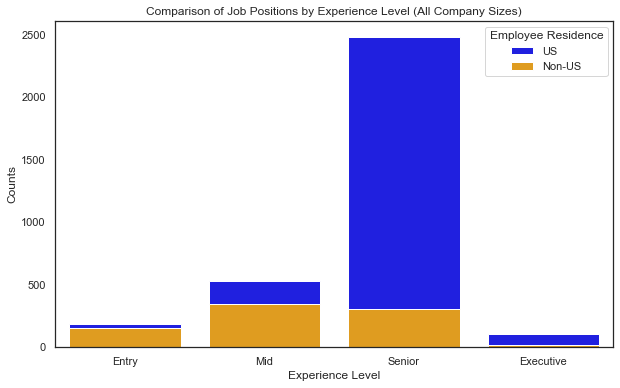

In [25]:
# Define the desired order of experience levels
df.experience_level.replace(['EN','MI','SE','EX'],['Entry','Mid','Senior','Executive'], inplace=True)
order = ['Entry','Mid','Senior','Executive']

# Calculate the counts of job positions for 'US' residence
counts_us = df[df['employee_residence'] == 'US']['experience_level'].value_counts().reindex(order)

# Calculate the counts of job positions for non-'US' residence
counts_non_us = df[df['employee_residence'] != 'US']['experience_level'].value_counts().reindex(order)

# Plot the counts for 'US' and non-'US' residents
plt.figure(figsize=(10, 6))
sns.barplot(x=counts_us.index, y=counts_us.values, color='blue', label='US', order=order)
sns.barplot(x=counts_non_us.index, y=counts_non_us.values, color='orange', label='Non-US', order=order)
plt.xlabel('Experience Level')
plt.ylabel('Counts')
plt.title('Comparison of Job Positions by Experience Level (All Company Sizes)')
plt.legend(title='Employee Residence')
plt.show()

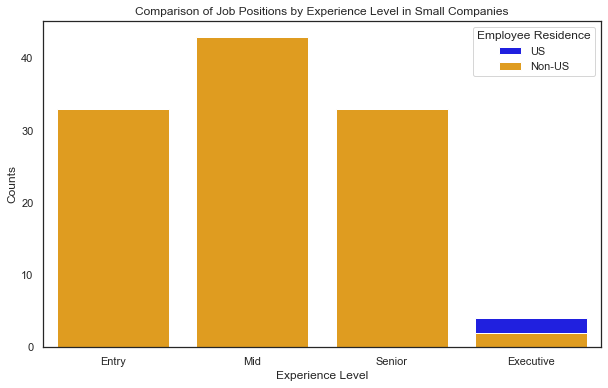

In [26]:
# Define the desired order of experience levels
order = ['Entry', 'Mid', 'Senior', 'Executive']

# Calculate the counts of job positions for 'US' residence and company size
counts_us = df[(df['employee_residence'] == 'US') & (df['company_size'].isin(['S']))]['experience_level'].value_counts().reindex(order)

# Calculate the counts of job positions for non-'US' residence and company size
counts_non_us = df[(df['employee_residence'] != 'US') & (df['company_size'].isin(['S']))]['experience_level'].value_counts().reindex(order)

# Plot the counts for 'US' and non-'US' residents
plt.figure(figsize=(10, 6))
sns.barplot(x=counts_us.index, y=counts_us.values, color='blue', label='US', order=order)
sns.barplot(x=counts_non_us.index, y=counts_non_us.values, color='orange', label='Non-US', order=order)
plt.xlabel('Experience Level')
plt.ylabel('Counts')
plt.title('Comparison of Job Positions by Experience Level in Small Companies')
plt.legend(title='Employee Residence')
plt.show()

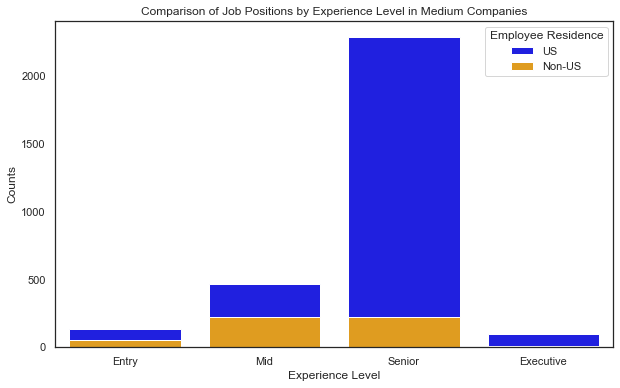

In [27]:
# Define the desired order of experience levels
order = ['Entry', 'Mid', 'Senior', 'Executive']

# Calculate the counts of job positions for 'US' residence and company size
counts_us = df[(df['employee_residence'] == 'US') & (df['company_size'].isin(['M']))]['experience_level'].value_counts().reindex(order)

# Calculate the counts of job positions for non-'US' residence and company size
counts_non_us = df[(df['employee_residence'] != 'US') & (df['company_size'].isin(['M']))]['experience_level'].value_counts().reindex(order)

# Plot the counts for 'US' and non-'US' residents
plt.figure(figsize=(10, 6))
sns.barplot(x=counts_us.index, y=counts_us.values, color='blue', label='US', order=order)
sns.barplot(x=counts_non_us.index, y=counts_non_us.values, color='orange', label='Non-US', order=order)
plt.xlabel('Experience Level')
plt.ylabel('Counts')
plt.title('Comparison of Job Positions by Experience Level in Medium Companies')
plt.legend(title='Employee Residence')
plt.show()

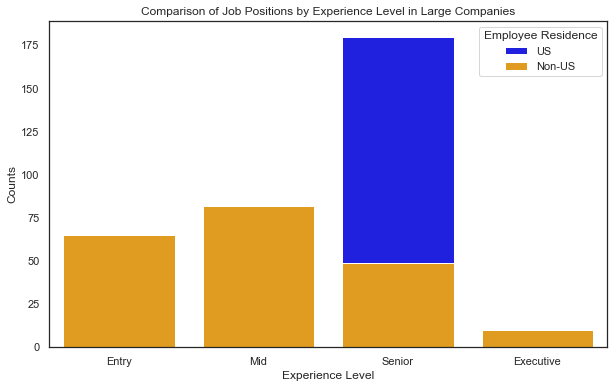

In [28]:
# Define the desired order of experience levels
order = ['Entry', 'Mid', 'Senior', 'Executive']

# Calculate the counts of job positions for 'US' residence and company size
counts_us = df[(df['employee_residence'] == 'US') & (df['company_size'].isin(['L']))]['experience_level'].value_counts().reindex(order)

# Calculate the counts of job positions for non-'US' residence and company size
counts_non_us = df[(df['employee_residence'] != 'US') & (df['company_size'].isin(['L']))]['experience_level'].value_counts().reindex(order)

# Plot the counts for 'US' and non-'US' residents
plt.figure(figsize=(10, 6))
sns.barplot(x=counts_us.index, y=counts_us.values, color='blue', label='US', order=order)
sns.barplot(x=counts_non_us.index, y=counts_non_us.values, color='orange', label='Non-US', order=order)
plt.xlabel('Experience Level')
plt.ylabel('Counts')
plt.title('Comparison of Job Positions by Experience Level in Large Companies')
plt.legend(title='Employee Residence')
plt.show()

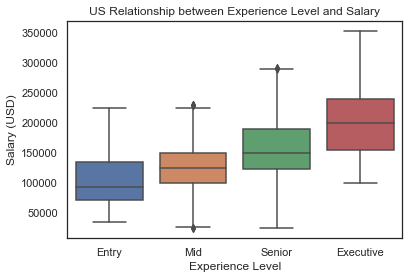

In [29]:
order = ['Entry','Mid','Senior','Executive']
# Plot a box plot to explore the relationship between experience_level and salary
sns.boxplot(x='experience_level', y='salary_in_usd', data=US_df, order=order)
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.title('US Relationship between Experience Level and Salary')
plt.show()

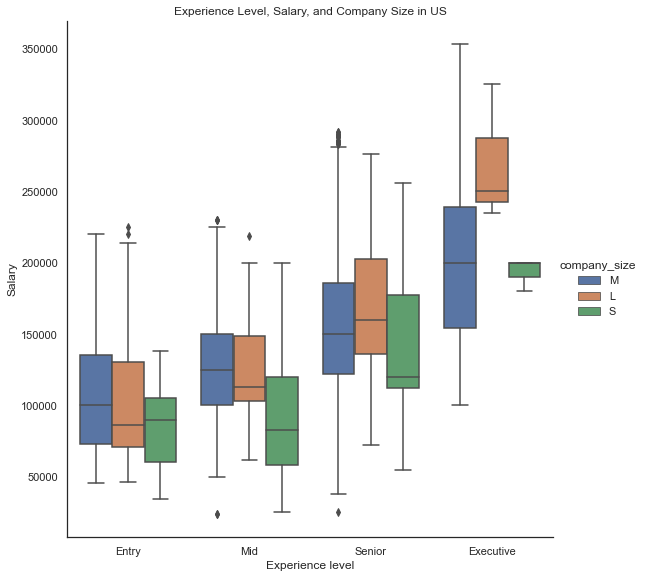

In [30]:
# Credit for below graph example: https://www.kaggle.com/code/nguyenthicamlai/data-science-job-salaries-eda-q-a
exp_order=['Entry','Mid','Senior','Executive']
sns.catplot(data=US_df,
           x='experience_level',
           y='salary_in_usd',
           order=exp_order,
           height=8,
           kind='box',
           hue='company_size')
plt.title('Experience Level, Salary, and Company Size in US')
plt.xlabel('Experience level')
plt.ylabel('Salary');

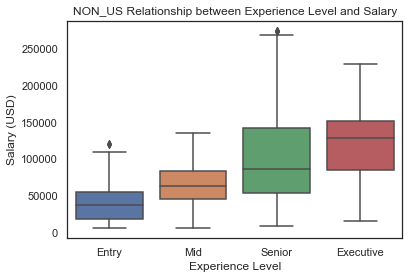

In [31]:
order = ['Entry','Mid','Senior','Executive']
# Plot a box plot to explore the relationship between experience_level and salary
sns.boxplot(x='experience_level', y='salary_in_usd', data=NON_US_df, order=order)
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.title('NON_US Relationship between Experience Level and Salary')
plt.show()

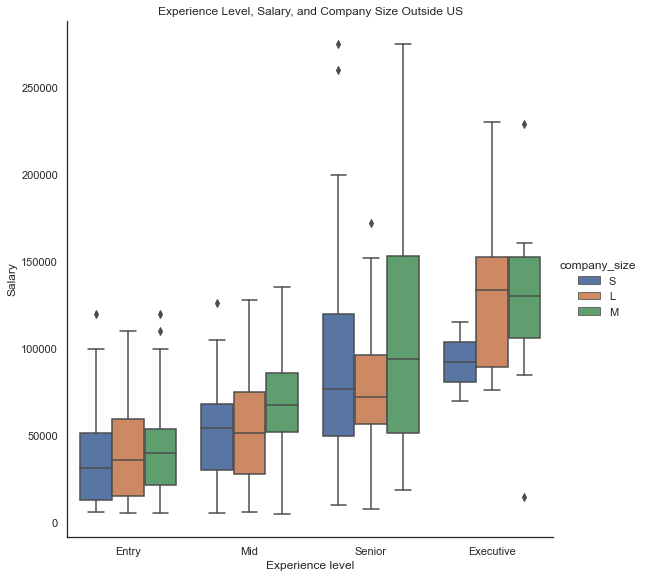

In [32]:
# Credit for below graph example: https://www.kaggle.com/code/nguyenthicamlai/data-science-job-salaries-eda-q-a
exp_order=['Entry','Mid','Senior','Executive']
sns.catplot(data=NON_US_df,
           x='experience_level',
           y='salary_in_usd',
           order=exp_order,
           height=8,
           kind='box',
           hue='company_size')
plt.title('Experience Level, Salary, and Company Size Outside US')
plt.xlabel('Experience level')
plt.ylabel('Salary');

### Standardize and get data ready for models:

In [33]:
US_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [34]:
# Create label encoder object
label_encoder = LabelEncoder()

# List of DataFrame names
dataframes = [NON_US_df, US_df]

# List of categorical variable column names
categorical_vars = ['experience_level', 'employment_type', 'job_title', 'employee_residence',
                    'company_location', 'company_size']

# Loop over the DataFrames
for df in dataframes:
    # Encode categorical variables in the current DataFrame
    for var in categorical_vars:
        encoded_var = var + '_encoded'
        df[encoded_var] = label_encoder.fit_transform(df[var])

# Final double check to remove possible NA's from column of interest
NON_US_df.dropna(subset=['salary_in_usd'], inplace=True)
US_df.dropna(subset=['salary_in_usd'], inplace=True)

In [35]:
US_df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_encoded,employment_type_encoded,job_title_encoded,employee_residence_encoded,company_location_encoded,company_size_encoded
1,2023,Senior,FT,Data Scientist,225000,USD,225000,US,0,US,M,3,1,38,0,6,1
2,2023,Senior,FT,Data Scientist,156400,USD,156400,US,0,US,M,3,1,38,0,6,1
3,2023,Senior,FT,Data Engineer,190000,USD,190000,US,100,US,M,3,1,25,0,6,1
4,2023,Senior,FT,Data Engineer,150000,USD,150000,US,100,US,M,3,1,25,0,6,1
5,2023,Senior,FT,Data Scientist,196000,USD,196000,US,0,US,M,3,1,38,0,6,1


In [36]:
US_df.describe()

,work_year,salary,salary_in_usd,remote_ratio,experience_level_encoded,employment_type_encoded,job_title_encoded,employee_residence_encoded,company_location_encoded,company_size_encoded
count,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.000000,3236.0,3236.000000,3236.000000
mean,2022.521941,150835.825093,150835.825093,43.711372,2.605686,0.998455,30.685105,0.0,5.993511,0.931088
std,0.587200,50648.407529,50648.407529,49.352927,0.804327,0.046491,14.316106,0.0,0.167594,0.298182
min,2020.000000,24000.000000,24000.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2022.000000,115000.000000,115000.000000,0.000000,3.000000,1.000000,22.000000,0.0,6.000000,1.000000
50%,2023.000000,145000.000000,145000.000000,0.000000,3.000000,1.000000,25.000000,0.0,6.000000,1.000000
75%,2023.000000,184025.000000,184025.000000,100.000000,3.000000,1.000000,38.000000,0.0,6.000000,1.000000
max,2023.000000,353200.000000,353200.000000,100.000000,3.000000,2.000000,70.000000,0.0,6.000000,2.000000


## Modeling US Data

###### LR Model

In [38]:
# Split the data into predictor variables (X) and the target variable (y)
X = US_df[['work_year', 'remote_ratio', 'experience_level_encoded', 'employment_type_encoded',
           'job_title_encoded', 'company_location_encoded', 'company_size_encoded']]
y = US_df['salary_in_usd']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {:.2f}".format(mse))
print("R-squared Score: {:.2f}".format(r2))


Mean Squared Error: 2264593367.50
R-squared Score: 0.10


###### Polynomial LR Model

In [39]:
# create a polynomial regression model and fit it to the training data
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly_train, y_train)

# make predictions on the test data
X_poly_test = poly.transform(X_test)
y_pred = model.predict(X_poly_test)

# calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {:.2f}".format(mse))
print("R-squared Score: {:.2f}".format(r2))


Mean Squared Error: 2217425860.94
R-squared Score: 0.12


###### Random Forest Model

In [41]:
# create a random forest regression model and fit it to the training data
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {:.2f}".format(mse))
print("R-squared Score: {:.2f}".format(r2))

Mean Squared Error: 1750447501.32
R-squared Score: 0.31


##### XGBoost Model

In [40]:
# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the test data
y_pred = model.predict(dtest)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Mean Squared Error: {:.2f}".format(mse))
print("XGBoost R-squared Score: {:.2f}".format(r2))

XGBoost Mean Squared Error: 1743683806.25
XGBoost R-squared Score: 0.31


### Best Model is Random Forest or XGB, gridsearch to optimize and Display

In [42]:
# create a random forest regression model
model = RandomForestRegressor(random_state=42)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [30, 40, 50],
    'max_depth': [5, 15, 30],
    'min_samples_split': [3, 5, 8],
    'min_samples_leaf': [4, 8, 12],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# get the best model
best_model = grid_search.best_estimator_

# make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model Parameters:", grid_search.best_params_)
print("Mean Squared Error: {:.2f}".format(mse))
print("R-squared Score: {:.2f}".format(r2))

Best Model Parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 30}
Mean Squared Error: 1759959847.95
R-squared Score: 0.30


In [43]:
# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.15, 0.1, 0.05],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create the XGBoost model
model = xgb.XGBRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Convert test data to DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_df)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model Parameters:", grid_search.best_params_)
print("XGBoost Mean Squared Error: {:.2f}".format(mse))
print("XGBoost R-squared Score: {:.2f}".format(r2))

Best Model Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
XGBoost Mean Squared Error: 1713257761.40
XGBoost R-squared Score: 0.32


### Predictions using best model (XGBoost)

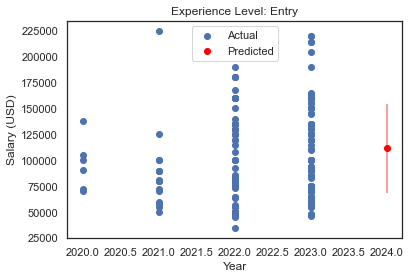

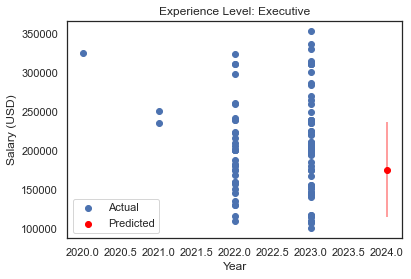

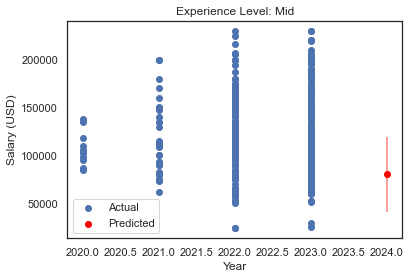

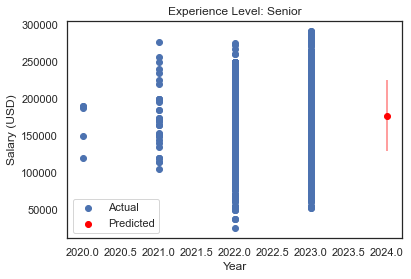

In [44]:
# create separate models and visuals for each experience level
for exp_level in sorted(US_df['experience_level'].unique()):
    # subset the data for the current experience level
    df_exp = US_df[US_df['experience_level'] == exp_level]

    if len(df_exp) == 0:
        # no data points for this experience level, skip to the next level
        continue

    # calculate the mean of additional features for the current experience level
    additional_features_mean = US_df[US_df['experience_level_encoded'] == exp_level][[
        'remote_ratio', 'experience_level_encoded', 'employment_type_encoded',
        'job_title_encoded', 'employee_residence_encoded', 'company_location_encoded',
        'company_size_encoded'
    ]].mean()

    # create an XGBoost model
    model = xgb.XGBRegressor(colsample_bytree=0.6, learning_rate=0.1, max_depth=5,
                             n_estimators=50, subsample=1.0)
    X = df_exp[['work_year', 'remote_ratio', 'experience_level_encoded', 'employment_type_encoded',
                'job_title_encoded', 'employee_residence_encoded', 'company_location_encoded',
                'company_size_encoded']]
    y = df_exp['salary_in_usd']
    model.fit(X, y)

    # make predictions for the year 2024
    pred_year = 2024
    X_pred = pd.DataFrame({
        'work_year': [pred_year],
        'remote_ratio': additional_features_mean['remote_ratio'],
        'experience_level_encoded': additional_features_mean['experience_level_encoded'],
        'employment_type_encoded': additional_features_mean['employment_type_encoded'],
        'job_title_encoded': additional_features_mean['job_title_encoded'],
        'employee_residence_encoded': additional_features_mean['employee_residence_encoded'],
        'company_location_encoded': additional_features_mean['company_location_encoded'],
        'company_size_encoded': additional_features_mean['company_size_encoded']
    })
    y_pred = model.predict(X_pred)

    # calculate the standard deviation
    y_std = np.std(df_exp['salary_in_usd'])

    # plot the actual and predicted salary data
    plt.scatter(df_exp['work_year'], df_exp['salary_in_usd'], label='Actual')
    plt.scatter(pred_year, y_pred, label='Predicted', color='red')
    plt.errorbar(pred_year, y_pred, yerr=y_std, color='red', alpha=0.5)
    plt.title('Experience Level: ' + str(exp_level))
    plt.xlabel('Year')
    plt.ylabel('Salary (USD)')
    plt.legend()
    plt.show()

### LR graph to show overall trend of data

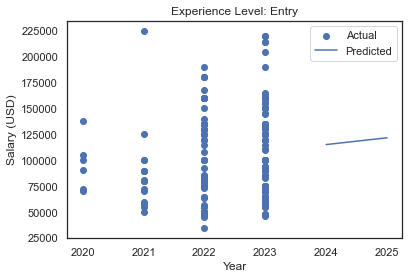

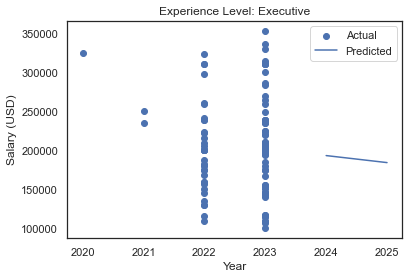

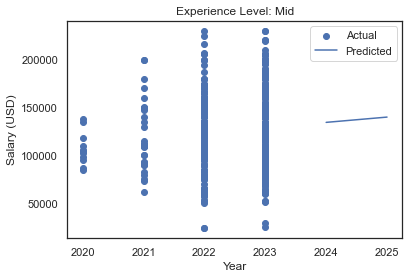

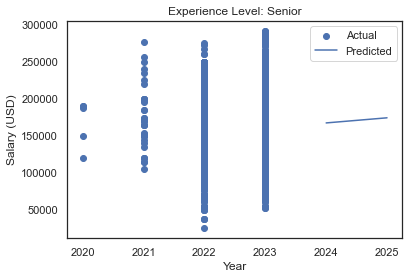

In [47]:
# create separate models and visuals for each experience level
for exp_level in sorted(US_df['experience_level'].unique()):
    # subset the data for the current experience level
    df_exp = US_df[US_df['experience_level'] == exp_level]

    if len(df_exp) == 0:
        # no data points for this experience level, skip to the next level
        continue

    # create a linear regression model
    model = LinearRegression()
    X = df_exp[['work_year']]
    y = df_exp['salary_in_usd']
    model.fit(X, y)

    # make predictions for the next two years
    pred_years = np.array([2024, 2025])
    X_pred = pd.DataFrame({'work_year': pred_years})
    y_pred = model.predict(X_pred)

    # plot the actual and predicted salary data
    plt.scatter(df_exp['work_year'], df_exp['salary_in_usd'], label='Actual')
    plt.plot(X_pred['work_year'], y_pred, label='Predicted')
    plt.title('Experience Level: ' + str(exp_level))
    plt.xlabel('Year')
    plt.ylabel('Salary (USD)')
    plt.legend()
    plt.show()


## Modeling International Data (Outside-US)

In [48]:
# Split the data into predictor variables (X) and the target variable (y)
X = NON_US_df[['work_year', 'remote_ratio', 'experience_level_encoded', 'employment_type_encoded',
               'job_title_encoded', 'company_location_encoded', 'company_size_encoded']]
y = NON_US_df['salary_in_usd']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) 

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {:.2f}".format(mse))
print("R-squared Score: {:.2f}".format(r2))

Mean Squared Error: 2430315162.71
R-squared Score: 0.27


In [49]:
# create a polynomial regression model and fit it to the training data
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly_train, y_train)

# make predictions on the test data
X_poly_test = poly.transform(X_test)
y_pred = model.predict(X_poly_test)

# calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {:.2f}".format(mse))
print("R-squared Score: {:.2f}".format(r2))


Mean Squared Error: 2276502906.41
R-squared Score: 0.32


In [51]:
# create a random forest regression model and fit it to the training data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {:.2f}".format(mse))
print("R-squared Score: {:.2f}".format(r2))

Mean Squared Error: 2024146156.08
R-squared Score: 0.39


In [50]:
# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the test data
y_pred = model.predict(dtest)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Mean Squared Error: {:.2f}".format(mse))
print("XGBoost R-squared Score: {:.2f}".format(r2))

XGBoost Mean Squared Error: 1963734219.79
XGBoost R-squared Score: 0.41


### Optimizing using gridsearch

In [52]:
# create a random forest regression model
model = RandomForestRegressor(random_state=42)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [30, 40, 50],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [1, 3, 5],
    'min_samples_leaf': [4, 8, 12],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# get the best model
best_model = grid_search.best_estimator_

# make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model Parameters:", grid_search.best_params_)
print("Mean Squared Error: {:.2f}".format(mse))
print("R-squared Score: {:.2f}".format(r2))

Best Model Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 40}
Mean Squared Error: 1712094125.30
R-squared Score: 0.49


In [53]:
# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.15, 0.1, 0.05],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create the XGBoost model
model = xgb.XGBRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Convert test data to DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_df)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model Parameters:", grid_search.best_params_)
print("XGBoost Mean Squared Error: {:.2f}".format(mse))
print("XGBoost R-squared Score: {:.2f}".format(r2))

Best Model Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
XGBoost Mean Squared Error: 1665508270.14
XGBoost R-squared Score: 0.50


### Prediction Visualizations

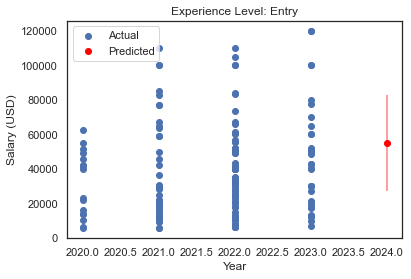

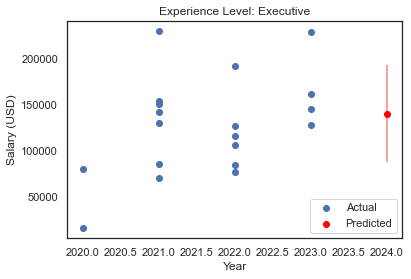

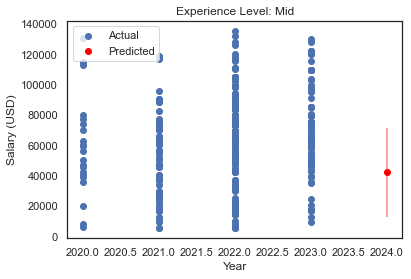

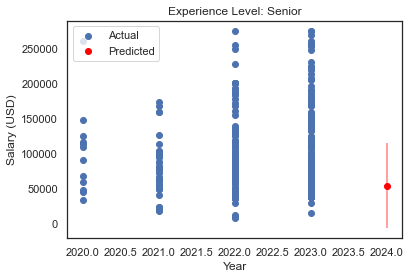

In [54]:
# create separate models and visuals for each experience level
for exp_level in sorted(NON_US_df['experience_level'].unique()):
    # subset the data for the current experience level
    df_exp = NON_US_df[NON_US_df['experience_level'] == exp_level]

    if len(df_exp) == 0:
        # no data points for this experience level, skip to the next level
        continue

    # calculate the mean of additional features for the current experience level
    additional_features_mean = NON_US_df[NON_US_df['experience_level_encoded'] == exp_level][[
        'remote_ratio', 'experience_level_encoded', 'employment_type_encoded',
        'job_title_encoded', 'employee_residence_encoded', 'company_location_encoded',
        'company_size_encoded'
    ]].mean()

    # create an XGBoost model
    model = xgb.XGBRegressor(colsample_bytree=0.6, learning_rate=0.05, max_depth=5,
                             n_estimators=150, subsample=0.6)
    X = df_exp[['work_year', 'remote_ratio', 'experience_level_encoded', 'employment_type_encoded',
                'job_title_encoded', 'employee_residence_encoded', 'company_location_encoded',
                'company_size_encoded']]
    y = df_exp['salary_in_usd']
    model.fit(X, y)

    # make predictions for the year 2024
    pred_year = 2024
    X_pred = pd.DataFrame({
        'work_year': [pred_year],
        'remote_ratio': additional_features_mean['remote_ratio'],
        'experience_level_encoded': additional_features_mean['experience_level_encoded'],
        'employment_type_encoded': additional_features_mean['employment_type_encoded'],
        'job_title_encoded': additional_features_mean['job_title_encoded'],
        'employee_residence_encoded': additional_features_mean['employee_residence_encoded'],
        'company_location_encoded': additional_features_mean['company_location_encoded'],
        'company_size_encoded': additional_features_mean['company_size_encoded']
    })
    y_pred = model.predict(X_pred)

    # calculate the standard deviation
    y_std = np.std(df_exp['salary_in_usd'])

    # plot the actual and predicted salary data
    plt.scatter(df_exp['work_year'], df_exp['salary_in_usd'], label='Actual')
    plt.scatter(pred_year, y_pred, label='Predicted', color='red')
    plt.errorbar(pred_year, y_pred, yerr=y_std, color='red', alpha=0.5)
    plt.title('Experience Level: ' + str(exp_level))
    plt.xlabel('Year')
    plt.ylabel('Salary (USD)')
    plt.legend()
    plt.show()


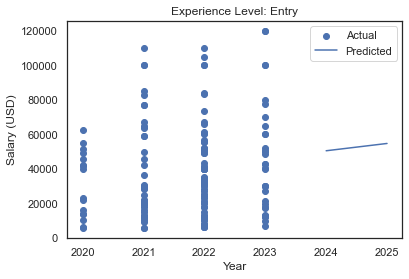

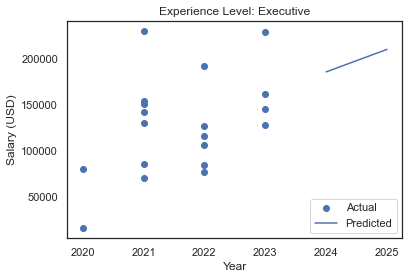

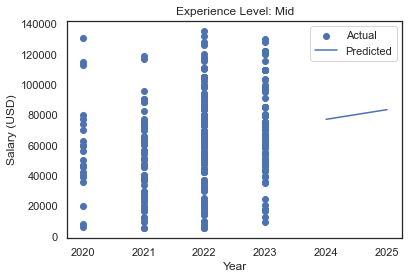

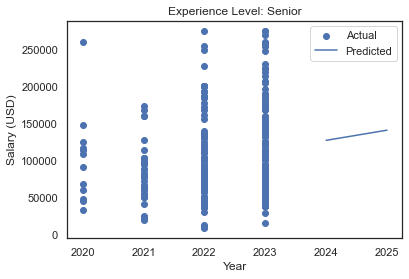

In [171]:
# create separate models and visuals for each experience level
for exp_level in sorted(NON_US_df['experience_level'].unique()):
    # subset the data for the current experience level
    df_exp = NON_US_df[NON_US_df['experience_level'] == exp_level]

    if len(df_exp) == 0:
        # no data points for this experience level, skip to the next level
        continue

    # create a linear regression model
    model = LinearRegression()
    X = df_exp[['work_year']]
    y = df_exp['salary_in_usd']
    model.fit(X, y)

    # make predictions for the next two years
    pred_years = np.array([2024, 2025])
    X_pred = pd.DataFrame({'work_year': pred_years})
    y_pred = model.predict(X_pred)

    # plot the actual and predicted salary data
    plt.scatter(df_exp['work_year'], df_exp['salary_in_usd'], label='Actual')
    plt.plot(X_pred['work_year'], y_pred, label='Predicted')
    plt.title('Experience Level: ' + str(exp_level))
    plt.xlabel('Year')
    plt.ylabel('Salary (USD)')
    plt.legend()
    plt.show()